In [201]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [202]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
m_u = X_train.mean(axis= 0)
sigma = X_train.std(axis= 0)
X_train = (X_train - m_u) / sigma
y_train = np.array([460, 232, 178])

In [203]:
m,n = X_train.shape
w_init = np.zeros((n, ))
b_init = 0.0

In [204]:
def predict(w, b, x):
    return np.dot(w,x) + b

In [205]:
def compute_cost(w, b, x, y):
    m = x.shape[0]
    predictions= np.dot(x, w) + b
    err = predictions - y
    cost = np.sum(err**2) / (2 * m)
    return cost

In [206]:
def compute_gradient(w, b, x, y):
    m = x.shape[0]
    
    predictions= np.dot(x, w) + b
    err= predictions - y
    dj_dw = np.dot(x.T, err) / m
    dj_db = err.sum() / m
    
    return dj_dw, dj_db

In [207]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = copy.deepcopy(w_in)
    b = b_in
    cost_his = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, x, y)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i < 100000 :
            cost_his.append(compute_cost(w, b, x, y))
    return w, b, np.array(cost_his)

In [208]:
iterations = 150
alpha = 1.0e-01

w_final, b_final, cost_his = gradient_descent(X_train, y_train, w_init, b_init, alpha, iterations)

print(f"w = {w_final}, b = {b_final : .4f}")
for i in range(m):
    print(f"prediction of x{i + 1}: {predict(w_final, b_final, X_train[i]): .2f}     and real value is: {y_train[i]: .2f}")

w = [ 38.05161525  41.54327431 -30.98894348  36.34177485], b =  290.0000
prediction of x1:  460.00     and real value is:  460.00
prediction of x2:  232.00     and real value is:  232.00
prediction of x3:  178.00     and real value is:  178.00


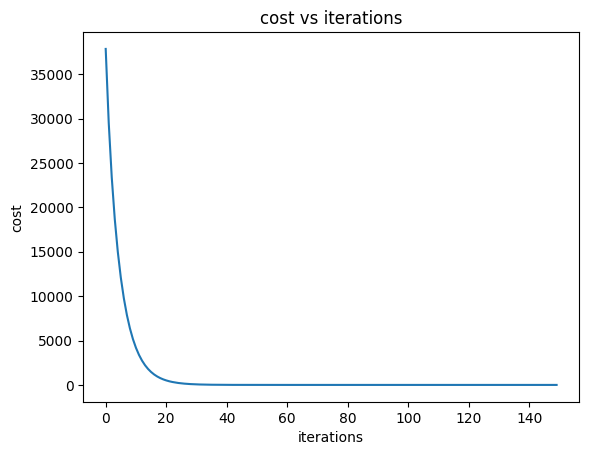

In [209]:

plt.plot(cost_his)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost vs iterations")

plt.show()

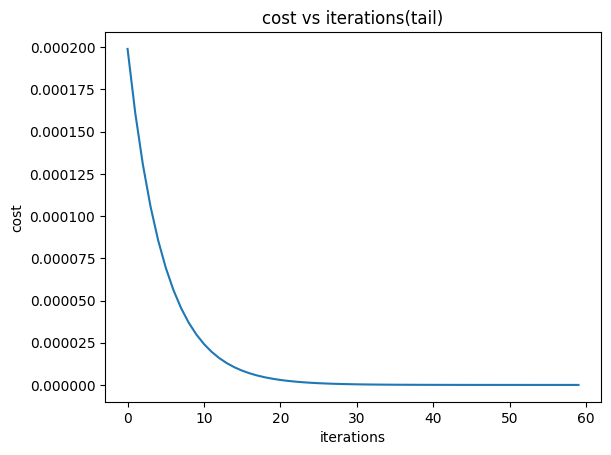

In [218]:
plt.plot(cost_his[90:])
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost vs iterations(tail)")

plt.show()

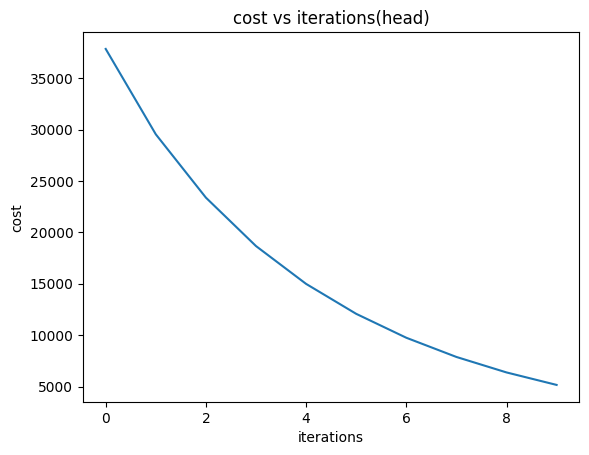

In [211]:
plt.plot(cost_his[:10])
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost vs iterations(head)")

plt.show()

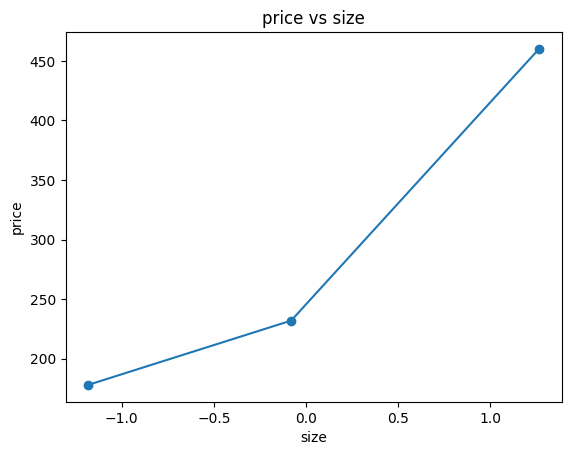

In [212]:
plt.scatter(X_train[:, 0], y_train)
y = np.array([predict(w_final, b_final, X_train[i]) for i in range(m)])
plt.plot(X_train[:, 0], y)
plt.xlabel("size")
plt.ylabel("price")
plt.title("price vs size")
plt.show()

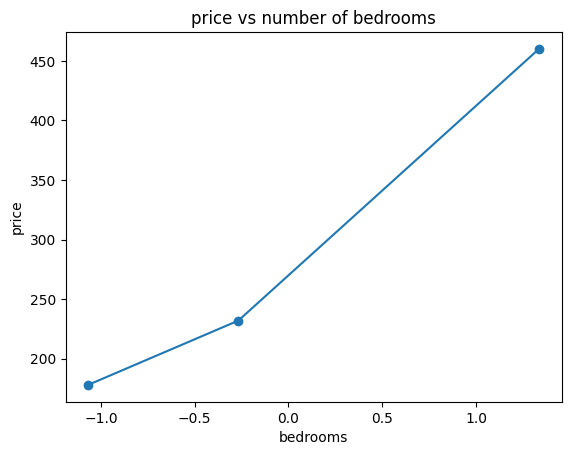

In [213]:
plt.scatter(X_train[:, 1], y_train)
y = np.array([predict(w_final, b_final, X_train[i]) for i in range(m)])
plt.plot(X_train[:, 1], y)
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.title("price vs number of bedrooms")
plt.show()

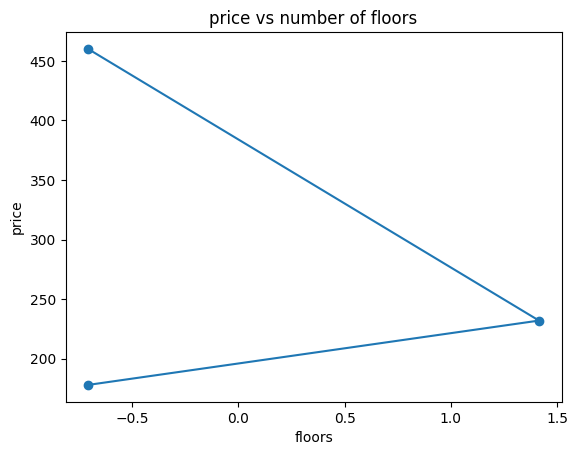

In [214]:
plt.scatter(X_train[:, 2], y_train)
y = np.array([predict(w_final, b_final, X_train[i]) for i in range(m)])
plt.plot(X_train[:, 2], y)
plt.xlabel("floors")
plt.ylabel("price")
plt.title("price vs number of floors")
plt.show()

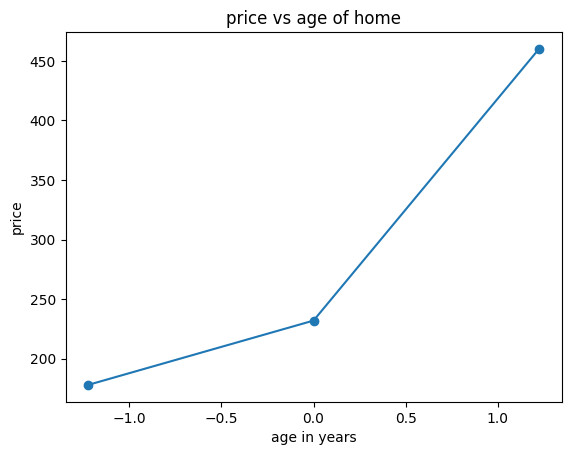

In [215]:
plt.scatter(X_train[:, 3], y_train)
y = np.array([predict(w_final, b_final, X_train[i]) for i in range(m)])
plt.plot(X_train[:, 3], y)
plt.xlabel("age in years")
plt.ylabel("price")
plt.title("price vs age of home")
plt.show()

In [216]:
def normalize(v, m_u, sigma):
    return (v - m_u) / sigma

In [217]:
v = np.array([2104, 5, 1, 45])
v = normalize(v, m_u, sigma)
print(predict(w_final, b_final, v))

459.9999585771381
